In [3]:
import pandas
import numpy

# example of auto-sklearn for the ml-100k regression dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import RepeatedKFold


# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [4]:
# load dataset
url = 'ratings_new.csv'
dataframe = read_csv(url)

In [5]:
# load dataset
import numpy as np

# split into input and output elements
data = dataframe.values
data = data.astype('float32')
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Convert lists to Numpy arrays
#X_train = np.asarray(X_train, dtype=np.float32)
#X_test = np.asarray(X_test, dtype=np.float32)
#y_train = np.asarray(y_train, dtype=np.float32)
#y_test = np.asarray(y_test, dtype=np.float32)

In [6]:
# prepare configuration for cross validation test harness
seed = 121
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: -0.016714 (0.013669)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DT: -0.820116 (0.351712)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVR: -0.051965 (0.053255)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: -0.186879 (0.063152)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: -0.225553 (0.076737)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GB: -0.028763 (0.055133)


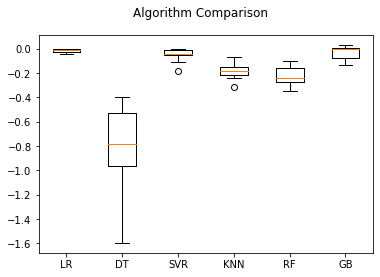

In [ ]:
# evaluate each model in turn
results = []
names = []
#scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae_dict = {}
rmse_dict = {}

results = []
names = []

for name, model in models:
  
  model.fit(X_train, y_train)
 
  # predict the target on the test dataset
  y_hat = model.predict(X_test)
  
  # Root Mean Squared Error on testing dataset
  rmse_test = mean_squared_error(y_test, y_hat, squared=False)
  
  # Mean Absolute Error on testing dataset
  mae_test = mean_absolute_error(y_test, y_hat)
  
  mae_dict[name] = mae_test
  rmse_dict[name] = rmse_test


In [11]:
mae_dict

{'DT': 0.9455914172376487,
 'GB': 0.770891400571006,
 'KNN': 0.8354039,
 'LR': 0.8276404,
 'RF': 0.7996960271667268,
 'SVR': 0.8233076941621774}

In [12]:
rmse_dict

{'DT': 1.2765246829803032,
 'GB': 0.9778858330598974,
 'KNN': 1.0687279,
 'LR': 1.0389571,
 'RF': 1.0434484445141203,
 'SVR': 1.054020659689333}